In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_auc_score, average_precision_score, recall_score, classification_report, accuracy_score
import scikitplot as skplt
from matplotlib.colors import ListedColormap

import librosa

## Loading data

In [3]:
df = pd.read_json("new_features.json")
print(df.head())
print('\n dataframe shape:', df.shape)

        filename label  chroma_stft1  chroma_stft2  chroma_stft3  \
0  pop.00027.wav   pop      0.299881      0.379244      0.470128   
1  pop.00033.wav   pop      0.544635      0.350781      0.388006   
2  pop.00032.wav   pop      0.443481      0.493255      0.373764   
3  pop.00026.wav   pop      0.463715      0.287497      0.316427   
4  pop.00030.wav   pop      0.401023      0.533435      0.290821   

   chroma_stft4  chroma_stft5  chroma_stft6  chroma_stft7  chroma_stft8  ...  \
0      0.325283      0.342244      0.313968      0.442569      0.401032  ...   
1      0.337791      0.391167      0.430018      0.447838      0.531868  ...   
2      0.478039      0.476955      0.344388      0.389499      0.403201  ...   
3      0.245788      0.323225      0.266904      0.250274      0.541873  ...   
4      0.372626      0.260384      0.372584      0.256875      0.289864  ...   

     mfcc31    mfcc32    mfcc33    mfcc34    mfcc35    mfcc36    mfcc37  \
0  1.255251 -2.895950 -4.593103 -2.

In [4]:
noisy_df = pd.read_json("noisy_data.json")
noisy_df = pd.DataFrame(noisy_df)
print(noisy_df.head())
print('\n dataframe shape:', noisy_df.shape)

              filename label  chroma_stft1  chroma_stft2  chroma_stft3  \
0  noisy_pop.00027.wav   pop      0.301405      0.380578      0.470909   
1  noisy_pop.00033.wav   pop      0.553039      0.361031      0.399264   
2  noisy_pop.00032.wav   pop      0.446532      0.503312      0.385121   
3  noisy_pop.00026.wav   pop      0.464116      0.288315      0.317472   
4  noisy_pop.00030.wav   pop      0.404327      0.532846      0.291451   

   chroma_stft4  chroma_stft5  chroma_stft6  chroma_stft7  chroma_stft8  ...  \
0      0.326243      0.343126      0.315052      0.443509      0.401989  ...   
1      0.350988      0.402286      0.429576      0.447139      0.538224  ...   
2      0.477731      0.491484      0.356068      0.392136      0.405469  ...   
3      0.246834      0.323764      0.267547      0.250985      0.542027  ...   
4      0.373560      0.261424      0.373583      0.257144      0.292758  ...   

     mfcc31    mfcc32    mfcc33    mfcc34    mfcc35    mfcc36    mfcc37  \

In [5]:
time_shifted_df = pd.read_json("time_shifted_data.json")
time_shifted_df = pd.DataFrame(time_shifted_df)
print(time_shifted_df.head())
print('\n dataframe shape:', time_shifted_df.shape)

                     filename label  chroma_stft1  chroma_stft2  chroma_stft3  \
0  time_shifted_pop.00027.wav   pop      0.306029      0.370010      0.475292   
1  time_shifted_pop.00033.wav   pop      0.547450      0.353257      0.388323   
2  time_shifted_pop.00032.wav   pop      0.443698      0.492472      0.373667   
3  time_shifted_pop.00026.wav   pop      0.467676      0.293827      0.315371   
4  time_shifted_pop.00030.wav   pop      0.401961      0.532432      0.290782   

   chroma_stft4  chroma_stft5  chroma_stft6  chroma_stft7  chroma_stft8  ...  \
0      0.336059      0.343012      0.309952      0.433466      0.412050  ...   
1      0.340149      0.389167      0.430209      0.444518      0.533291  ...   
2      0.479971      0.475356      0.342859      0.389272      0.404013  ...   
3      0.248235      0.321149      0.271514      0.246058      0.538563  ...   
4      0.371661      0.260640      0.372821      0.256044      0.291768  ...   

     mfcc31    mfcc32    mfcc33 

In [6]:
pitch_shifted_df = pd.read_json("pitch_shifted_data.json")
pitch_shifted_df = pd.DataFrame(pitch_shifted_df)
print(pitch_shifted_df.head())
print('\n dataframe shape:', pitch_shifted_df.shape)

                      filename label  chroma_stft1  chroma_stft2  \
0  pitch_shifted_pop.00027.wav   pop      0.366113      0.479945   
1  pitch_shifted_pop.00033.wav   pop      0.424664      0.449109   
2  pitch_shifted_pop.00032.wav   pop      0.367452      0.411067   
3  pitch_shifted_pop.00026.wav   pop      0.276579      0.290280   
4  pitch_shifted_pop.00030.wav   pop      0.402695      0.285293   

   chroma_stft3  chroma_stft4  chroma_stft5  chroma_stft6  chroma_stft7  \
0      0.421510      0.386257      0.470269      0.406797      0.454519   
1      0.541994      0.431946      0.437220      0.368296      0.453353   
2      0.434475      0.496180      0.398096      0.418036      0.494318   
3      0.556706      0.414837      0.360338      0.259230      0.362898   
4      0.316991      0.489363      0.344343      0.438938      0.296533   

   chroma_stft8  ...    mfcc31    mfcc32    mfcc33    mfcc34    mfcc35  \
0      0.339842  ... -0.698094  7.363560  0.062337  0.067894 -0.67

## Modelling

In [778]:
df1 = df.copy()

In [779]:
df1.pop('filename')

0       pop.00027.wav
1       pop.00033.wav
2       pop.00032.wav
3       pop.00026.wav
4       pop.00030.wav
            ...      
995    jazz.00018.wav
996    jazz.00032.wav
997    jazz.00026.wav
998    jazz.00027.wav
999    jazz.00033.wav
Name: filename, Length: 1000, dtype: object

### Choosing the outcome and predictor variables

In [780]:
y = df1.pop('label')

In [781]:
y.value_counts(normalize=True)

country      0.1
pop          0.1
metal        0.1
reggae       0.1
rock         0.1
blues        0.1
classical    0.1
jazz         0.1
hiphop       0.1
disco        0.1
Name: label, dtype: float64

The baseline is of 0.1 and the dataset is balanced.

In [782]:
X = df1

### Creating train_test split

In [783]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [784]:
noisy_df_copy = noisy_df.copy()

In [785]:
noisy_df_copy.drop(noisy_df_copy.index[X_test.index], inplace=True)

In [786]:
time_shifted_df_copy = time_shifted_df.copy()

In [787]:
time_shifted_df_copy.drop(time_shifted_df_copy.index[X_test.index], inplace=True)

In [788]:
pitch_shifted_df_copy = pitch_shifted_df.copy()

In [789]:
pitch_shifted_df_copy.drop(pitch_shifted_df_copy.index[X_test.index], inplace=True)

In [790]:
augmented_df_new = noisy_df_copy
augmented_df_new = augmented_df_new.append(time_shifted_df_copy)

In [791]:
augmented_df_new = augmented_df_new.append(pitch_shifted_df_copy)

In [792]:
X_train = X_train.append(augmented_df_new.iloc[:,2:])

In [793]:
y_train = y_train.append(augmented_df_new.iloc[:,1])

### Rescaling the variables

In [794]:
scaler = StandardScaler()

In [795]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### Logistic Regression

#### Fitting a model

In [806]:
lr = LogisticRegression(max_iter=10000, solver='saga', class_weight='balanced', 
                        multi_class = 'multinomial', C=5)
lr.fit(X_train,y_train)
print('Training Score:', lr.score(X_train, y_train))
print('CV Mean Score:',cross_val_score(lr, X_train, y_train, cv=20, n_jobs=-1,
                                       scoring='precision_macro').mean())
print('Test Score:', lr.score(X_test, y_test))

Training Score: 0.860625
CV Mean Score: 0.7700398408390029
Test Score: 0.695


#### Determining feature importances

In [455]:
pd.DataFrame(lr.coef_, columns=X_train.columns, index=lr.classes_)

,chroma_stft1,chroma_stft2,chroma_stft3,chroma_stft4,chroma_stft5,chroma_stft6,chroma_stft7,chroma_stft8,chroma_stft9,chroma_stft10,...,mfcc31,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40
blues,0.697993,-1.830453,-0.029317,-0.757371,0.185471,0.527627,-0.544669,-0.844340,0.184332,-0.667875,...,0.559929,-0.704398,-0.162303,-0.173883,0.604400,0.174116,0.048362,0.261971,-0.130535,-0.986298
classical,-0.926605,-1.725741,0.840798,-2.172402,-0.397458,0.029493,0.655055,-1.172891,-0.070074,0.807565,...,0.495845,0.205126,0.915085,0.576975,0.334690,-0.121607,-0.208317,-1.152712,0.667126,-0.657962
country,-0.483582,0.166132,-0.996584,1.312652,-0.577549,0.303760,-0.199648,-0.346595,0.273307,0.419767,...,-0.070894,-0.535253,0.051895,-0.263324,-0.263564,0.129340,-0.065281,0.347271,-0.020596,-0.254096
disco,0.842959,0.176133,-0.421990,0.936189,0.279480,0.046129,0.304222,0.622267,-0.520984,0.225104,...,-0.203809,0.050978,0.042908,-0.375644,-0.109416,0.413978,-0.379750,0.283065,-0.316620,0.058569
hiphop,-0.057100,1.370970,-0.723827,0.903160,-0.199896,0.444742,-0.071324,0.881937,0.242955,-0.475702,...,0.817137,-0.296691,0.137564,0.145783,-0.171186,0.003336,0.131362,-0.078363,0.165458,0.096128
jazz,0.405276,-0.586493,-0.418163,0.074301,-0.178042,0.874199,-0.635665,-0.969845,1.646135,-1.027380,...,-0.508364,-0.263310,-0.249161,-0.330385,-0.069624,-0.115124,0.165623,0.176652,-0.542830,-0.440281
metal,-1.391386,1.509447,0.732963,0.386365,0.457548,-0.050808,-0.107503,0.955001,-1.123986,0.333181,...,-0.249761,0.542796,0.009077,-0.082779,0.182110,-0.416680,-0.287508,0.264375,-0.698193,1.562685
pop,0.988894,-0.550801,0.122968,-0.395512,-0.436315,-1.310140,1.593465,0.038713,-1.162599,-0.640602,...,-0.525536,1.004447,-0.533186,1.005749,-0.827560,-0.387510,-0.056122,0.489046,-0.281619,0.575808
reggae,0.179551,1.293158,0.182350,-0.015517,0.129042,0.118301,-0.329276,1.190518,0.283737,0.361879,...,0.381863,0.111041,0.065066,-0.409724,0.278452,0.022238,0.341710,-0.627471,0.541255,-0.188776
rock,-0.255999,0.177647,0.710803,-0.271866,0.737719,-0.983304,-0.664656,-0.354764,0.247177,0.664064,...,-0.696411,-0.114736,-0.276945,-0.092768,0.041698,0.297912,0.309921,0.036166,0.616554,0.234223


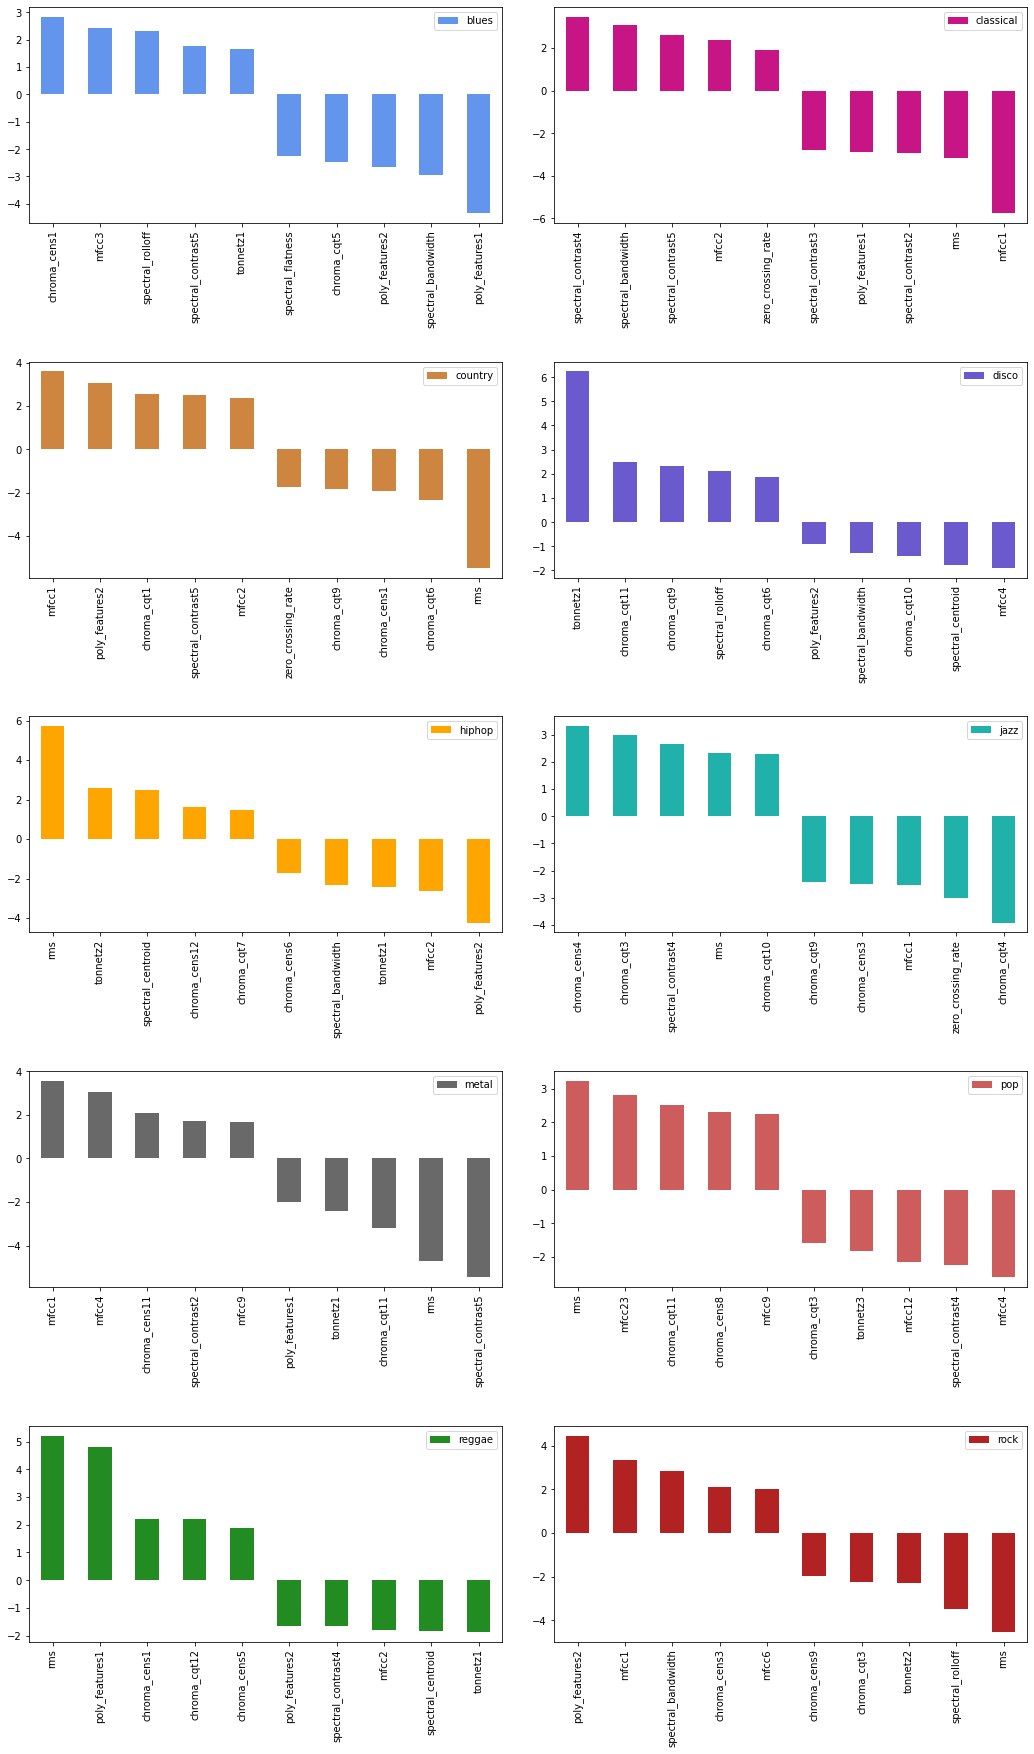

In [492]:
fig,ax = plt.subplots(ncols=2, nrows=5, figsize=(15,25))

ax[0,0] = pd.DataFrame(lr.coef_,
                       columns=X_train.columns, 
                       index=lr.classes_).iloc[0,:].sort_values(ascending=False).iloc[np.r_[0:5, -5:0]].plot(kind='bar',
                                                                                                                  ax=ax[0,0],
                                                                                                                  color ='cornflowerblue')
ax[0,1] = pd.DataFrame(lr.coef_,
                       columns=X_train.columns, 
                       index=lr.classes_).iloc[1,:].sort_values(ascending=False).iloc[np.r_[0:5, -5:0]].plot(kind='bar',
                                                                                                                  ax=ax[0,1],
                                                                                                                  color = 'mediumvioletred')

ax[1,0] = pd.DataFrame(lr.coef_,
                       columns=X_train.columns, 
                       index=lr.classes_).iloc[2,:].sort_values(ascending=False).iloc[np.r_[0:5, -5:0]].plot(kind='bar',
                                                                                                                  ax=ax[1,0],
                                                                                                                  color='peru')

ax[1,1] = pd.DataFrame(lr.coef_,
                       columns=X_train.columns, 
                       index=lr.classes_).iloc[3,:].sort_values(ascending=False).iloc[np.r_[0:5, -5:0]].plot(kind='bar',
                                                                                                                  ax=ax[1,1],
                                                                                                                  color='slateblue')
ax[2,0] = pd.DataFrame(lr.coef_,
                       columns=X_train.columns, 
                       index=lr.classes_).iloc[4,:].sort_values(ascending=False).iloc[np.r_[0:5, -5:0]].plot(kind='bar',
                                                                                                                  ax=ax[2,0],
                                                                                                                  color='orange')
ax[2,1] = pd.DataFrame(lr.coef_,
                       columns=X_train.columns, 
                       index=lr.classes_).iloc[5,:].sort_values(ascending=False).iloc[np.r_[0:5, -5:0]].plot(kind='bar',
                                                                                                                  ax=ax[2,1],
                                                                                                                  color = 'lightseagreen')
ax[3,0] = pd.DataFrame(lr.coef_,
                       columns=X_train.columns, 
                       index=lr.classes_).iloc[6,:].sort_values(ascending=False).iloc[np.r_[0:5, -5:0]].plot(kind='bar',
                                                                                                                  ax=ax[3,0],
                                                                                                                  color = 'dimgray')
ax[3,1] = pd.DataFrame(lr.coef_,
                       columns=X_train.columns, 
                       index=lr.classes_).iloc[7,:].sort_values(ascending=False).iloc[np.r_[0:5, -5:0]].plot(kind='bar',
                                                                                                                  ax=ax[3,1],
                                                                                                                  color = 'indianred')
ax[4,0] = pd.DataFrame(lr.coef_,
                       columns=X_train.columns, 
                       index=lr.classes_).iloc[8,:].sort_values(ascending=False).iloc[np.r_[0:5, -5:0]].plot(kind='bar',
                                                                                                                  ax=ax[4,0],
                                                                                                                  color = 'forestgreen')
ax[4,1] = pd.DataFrame(lr.coef_,
                       columns=X_train.columns, 
                       index=lr.classes_).iloc[9,:].sort_values(ascending=False).iloc[np.r_[0:5, -5:0]].plot(kind='bar',
                                                                                                                  ax=ax[4,1],
                                                                                                                  color='firebrick')

ax[0,0].legend([lr.classes_[0]])
ax[0,1].legend([lr.classes_[1]])
ax[1,0].legend([lr.classes_[2]])
ax[1,1].legend([lr.classes_[3]])
ax[2,0].legend([lr.classes_[4]])
ax[2,1].legend([lr.classes_[5]])
ax[3,0].legend([lr.classes_[6]])
ax[3,1].legend([lr.classes_[7]])
ax[4,0].legend([lr.classes_[8]])
ax[4,1].legend([lr.classes_[9]])

fig.tight_layout(pad=3.0)
plt.show()

We can see that MFCCs are the most important features for most genres.

#### Calculating the confusion matrix

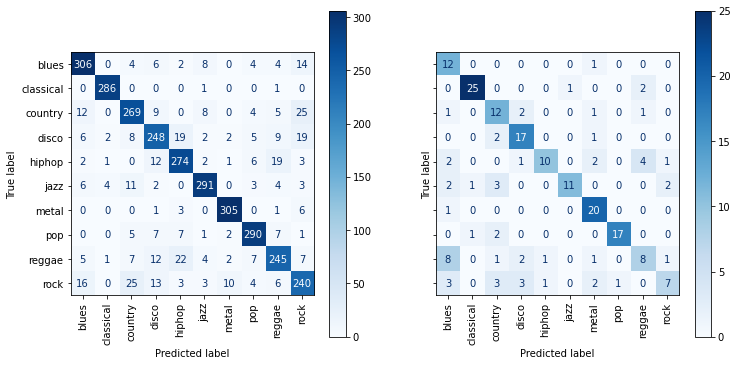

In [457]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
ax[0] = plot_confusion_matrix(lr, X_train, y_train, cmap='Blues', ax=ax[0], 
                              xticks_rotation='vertical')
ax[1] = plot_confusion_matrix(lr, X_test, y_test, cmap='Blues', ax=ax[1],
                             xticks_rotation='vertical')

plt.show()

In the training set, the genres with the highest number of true positives are blues and metal. While, in the test set, classical and metal have the most true positives.

#### Getting the classification report

In [454]:
print('Training Set:\n', classification_report(y_train, lr.predict(X_train)))
print('Test Set:\n',classification_report(y_test, lr.predict(X_test)))

Training Set:
               precision    recall  f1-score   support

       blues       0.87      0.88      0.87       348
   classical       0.97      0.99      0.98       288
     country       0.82      0.81      0.81       332
       disco       0.80      0.78      0.79       320
      hiphop       0.83      0.86      0.84       320
        jazz       0.91      0.90      0.90       324
       metal       0.95      0.97      0.96       316
         pop       0.90      0.91      0.90       320
      reggae       0.81      0.79      0.80       312
        rock       0.75      0.75      0.75       320

    accuracy                           0.86      3200
   macro avg       0.86      0.86      0.86      3200
weighted avg       0.86      0.86      0.86      3200

Test Set:
               precision    recall  f1-score   support

       blues       0.41      0.92      0.57        13
   classical       0.93      0.89      0.91        28
     country       0.52      0.71      0.60        1

When the model predicts blues, there is a probability of 41% that the song is actually blues. For 100 blues songs, my model will predict 92 of them. The same interpretation goes for other genres.

#### Plotting the precision-recall curve

In [458]:
cmap = ListedColormap(sns.color_palette('husl',10))

In [459]:
def plot_f1_lines(figsize=(8, 6), fontsize=16):
    '''Create f1-score level lines to be added to the precison-recall plot'''

    fig, ax = plt.subplots(figsize=figsize)

    # add lines of constant F1 scores

    for const in np.linspace(0.2, 0.9, 8):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        
    return fig, ax

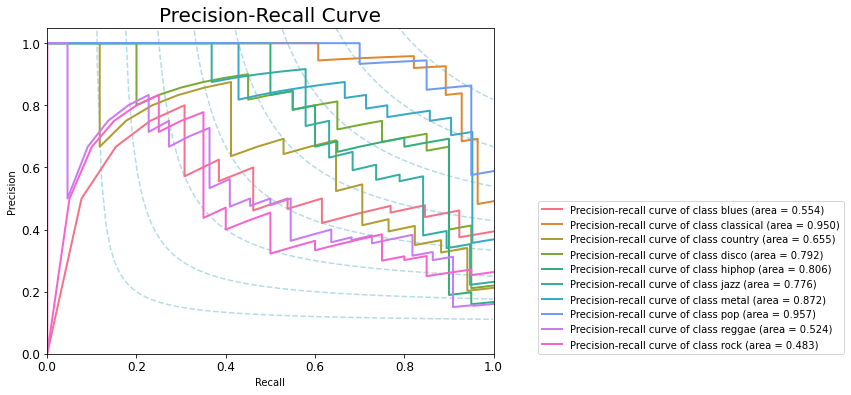

In [460]:
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, lr.predict_proba(X_test),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=12, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

The genres with the best AP are classical and pop. 

#### Calculating the roc_auc score and plotting the roc curve

In [461]:
print('Training Set ROC_AUC Score:', roc_auc_score(y_train, lr.predict_proba(X_train), multi_class='ovo'), 
'\n Test Set ROC_AUC Score:', roc_auc_score(y_test, lr.predict_proba(X_test), multi_class='ovo'))

Training Set ROC_AUC Score: 0.9866611646730186 
 Test Set ROC_AUC Score: 0.9458541177686467


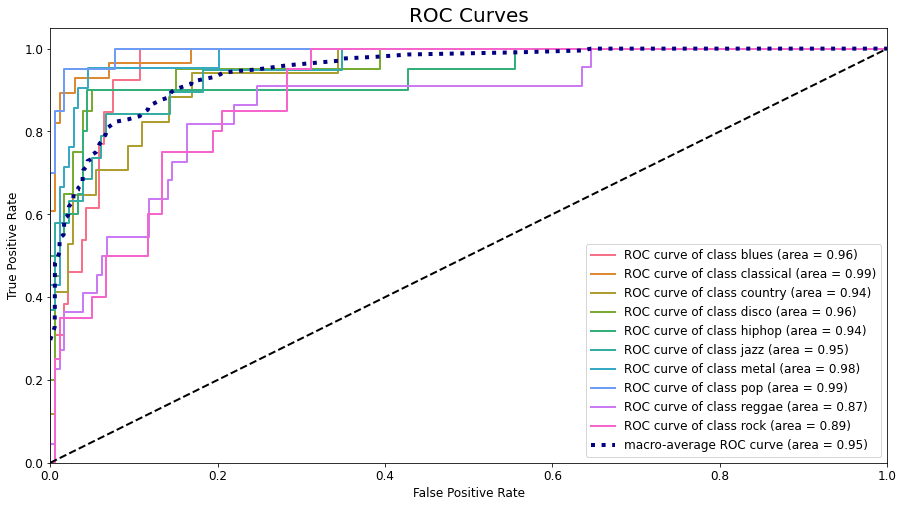

In [462]:
skplt.metrics.plot_roc(y_test, lr.predict_proba(X_test), plot_micro=False, plot_macro=True,
                       title_fontsize=20, text_fontsize=12, figsize=(15, 8), cmap=cmap)
plt.show()

We can observe that the genres with the highest AUC are classical and pop.

### Support Vector Classifier (SVC)

#### Fitting models

In [722]:
svc = SVC(max_iter=10000, C=7, decision_function_shape='ovo', class_weight='balanced',
         kernel='poly', gamma='auto', probability=True, degree=3)

svc.fit(X_train,y_train)
print('Training Score:', svc.score(X_train, y_train))
print('CV Mean Score:',cross_val_score(svc, X_train, y_train, cv=20, n_jobs=-1,
                                      scoring='precision_macro').mean())
print('Test Score:', svc.score(X_test, y_test))

Training Score: 0.99625
CV Mean Score: 0.8869396844555512
Test Score: 0.735


I chose SVC because it is regarded as one of the best multi-class classification algorithms. In fact, the best cross validated mean score and test score I got was with this model.

####  Determining feature importances

It is very hard to interpret dual coefficients and support vectors, especially when having 10 classes and 97 features.

#### Calculating the confusion matrix

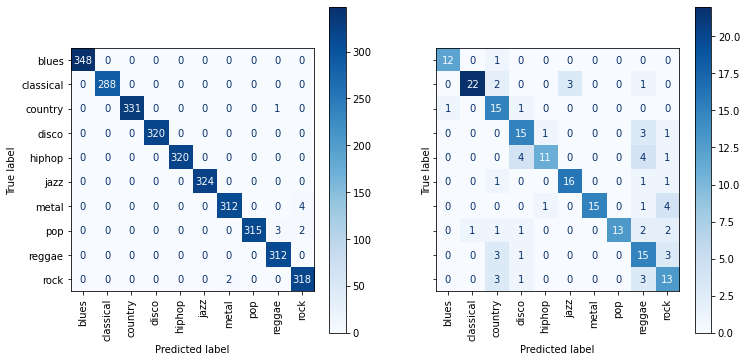

In [465]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
ax[0] = plot_confusion_matrix(svc, X_train, y_train, cmap='Blues', ax=ax[0], 
                              xticks_rotation='vertical')
ax[1] = plot_confusion_matrix(svc, X_test, y_test, cmap='Blues', ax=ax[1],
                             xticks_rotation='vertical')

plt.show()

In the training set, the genres with the highest number of true positives are blues and country. In the test set, they are classical and jazz.

#### Getting the classification report 

In [464]:
print('Training Set:\n', classification_report(y_train, svc.predict(X_train)))
print('Test Set:\n',classification_report(y_test, svc.predict(X_test)))

Training Set:
               precision    recall  f1-score   support

       blues       1.00      1.00      1.00       348
   classical       1.00      1.00      1.00       288
     country       1.00      1.00      1.00       332
       disco       1.00      1.00      1.00       320
      hiphop       1.00      1.00      1.00       320
        jazz       1.00      1.00      1.00       324
       metal       0.99      0.99      0.99       316
         pop       1.00      0.98      0.99       320
      reggae       0.99      1.00      0.99       312
        rock       0.98      0.99      0.99       320

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200

Test Set:
               precision    recall  f1-score   support

       blues       0.92      0.92      0.92        13
   classical       0.96      0.79      0.86        28
     country       0.58      0.88      0.70        1

In my test set, when the model predicts blues, there is a probability of 92% that the song is actually blues. For 100 blues songs, my model will predict 92 of them. The same interpretation goes for other genres.

#### Plotting the precision-recall curve

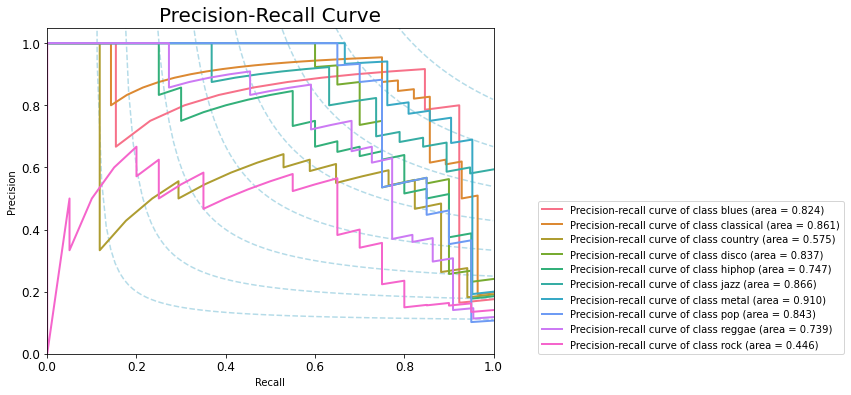

In [466]:
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, svc.predict_proba(X_test),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=12, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

The genres with the best AP are metal and jazz.

#### Calculating the roc_auc score and plotting the roc curve

In [467]:
print('Training Set ROC_AUC Score:', roc_auc_score(y_train, svc.predict_proba(X_train), multi_class='ovo'), 
'\n Test Set ROC_AUC Score:', roc_auc_score(y_test, svc.predict_proba(X_test), multi_class='ovo'))

Training Set ROC_AUC Score: 0.999992393821942 
 Test Set ROC_AUC Score: 0.9373464793147455


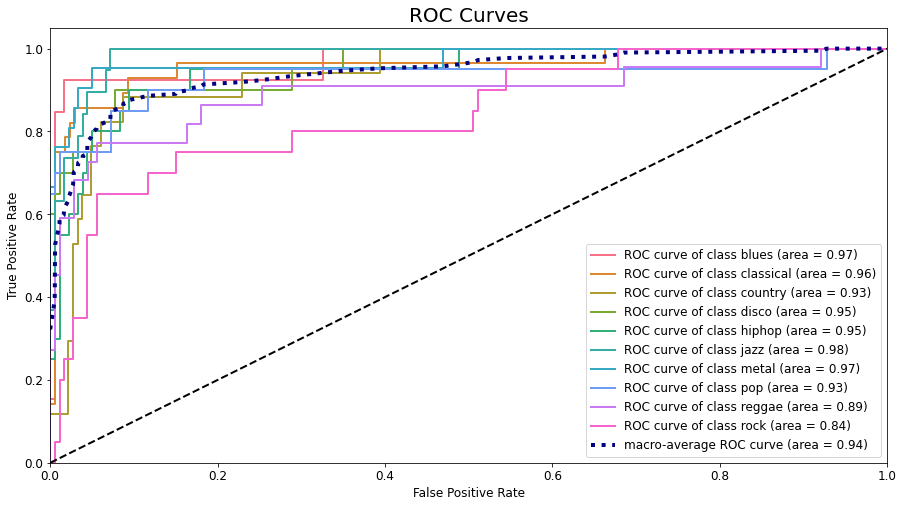

In [468]:
skplt.metrics.plot_roc(y_test, svc.predict_proba(X_test), plot_micro=False, plot_macro=True,
                       title_fontsize=20, text_fontsize=12, figsize=(15, 8), cmap=cmap)
plt.show()

We can notice that the genres with the highest AUC are blues and metal.

## Testing the SVC model on new data

In [148]:
def feature_extraction(signal):
    
    data = {
            "chroma_stft1": [],
            "chroma_stft2": [],
            "chroma_stft3": [],
            "chroma_stft4": [],
            "chroma_stft5": [],
            "chroma_stft6": [],
            "chroma_stft7": [],
            "chroma_stft8": [],
            "chroma_stft9": [],
            "chroma_stft10": [],
            "chroma_stft11": [],
            "chroma_stft12": [],
            "chroma_cqt1": [],
            "chroma_cqt2": [],
            "chroma_cqt3": [],
            "chroma_cqt4": [],
            "chroma_cqt5": [],
            "chroma_cqt6": [],
            "chroma_cqt7": [],
            "chroma_cqt8": [],
            "chroma_cqt9": [],
            "chroma_cqt10": [],
            "chroma_cqt11": [],
            "chroma_cqt12": [],
            "chroma_cens1": [],
            "chroma_cens2": [],
            "chroma_cens3": [],
            "chroma_cens4": [],
            "chroma_cens5": [],
            "chroma_cens6": [],
            "chroma_cens7": [],
            "chroma_cens8": [],
            "chroma_cens9": [],
            "chroma_cens10": [],
            "chroma_cens11": [],
            "chroma_cens12": [],
            "rms": [],
            "spectral_centroid": [], 
            "spectral_bandwidth": [], 
            "spectral_flatness": [],
            "spectral_rolloff": [],
            "spectral_contrast1": [],
            "spectral_contrast2": [],
            "spectral_contrast3": [],
            "spectral_contrast4": [],
            "spectral_contrast5": [],
            "spectral_contrast6": [],
            "spectral_contrast7": [],
            "poly_features1": [],
            "poly_features2": [],
            "tonnetz1": [],
            "tonnetz2": [],
            "tonnetz3": [],
            "tonnetz4": [],
            "tonnetz5": [],
            "tonnetz6": [],
            "zero_crossing_rate": [],
            "mfcc1": [],
            "mfcc2": [],
            "mfcc3": [],
            "mfcc4": [],
            "mfcc5": [],
            "mfcc6": [],
            "mfcc7": [],
            "mfcc8": [],
            "mfcc9": [],
            "mfcc10": [],
            "mfcc11": [],
            "mfcc12": [],
            "mfcc13": [],
            "mfcc14": [],
            "mfcc15": [],
            "mfcc16": [],
            "mfcc17": [],
            "mfcc18": [],
            "mfcc19": [],
            "mfcc20": [],
            "mfcc21": [],
            "mfcc22": [],
            "mfcc23": [],
            "mfcc24": [],
            "mfcc25": [],
            "mfcc26": [],
            "mfcc27": [],
            "mfcc28": [],
            "mfcc29": [],
            "mfcc30": [],
            "mfcc31": [],
            "mfcc32": [],
            "mfcc33": [],
            "mfcc34": [],
            "mfcc35": [],
            "mfcc36": [],
            "mfcc37": [],
            "mfcc38": [],
            "mfcc39": [],
            "mfcc40": [],
            }



    # extract spectral features
    chroma_stft1 = librosa.feature.chroma_stft(signal)[0].mean()
    chroma_stft1 = chroma_stft1.T
    chroma_stft2 = librosa.feature.chroma_stft(signal)[1].mean()
    chroma_stft2 = chroma_stft2.T
    chroma_stft3 = librosa.feature.chroma_stft(signal)[2].mean()
    chroma_stft3 = chroma_stft3.T
    chroma_stft4 = librosa.feature.chroma_stft(signal)[3].mean()
    chroma_stft4 = chroma_stft4.T
    chroma_stft5 = librosa.feature.chroma_stft(signal)[4].mean()
    chroma_stft5 = chroma_stft5.T
    chroma_stft6 = librosa.feature.chroma_stft(signal)[5].mean()
    chroma_stft6 = chroma_stft6.T
    chroma_stft7 = librosa.feature.chroma_stft(signal)[6].mean()
    chroma_stft7 = chroma_stft7.T
    chroma_stft8 = librosa.feature.chroma_stft(signal)[7].mean()
    chroma_stft8 = chroma_stft8.T
    chroma_stft9 = librosa.feature.chroma_stft(signal)[8].mean()
    chroma_stft9 = chroma_stft9.T
    chroma_stft10 = librosa.feature.chroma_stft(signal)[9].mean()
    chroma_stft10 = chroma_stft10.T
    chroma_stft11 = librosa.feature.chroma_stft(signal)[10].mean()
    chroma_stft11 = chroma_stft11.T
    chroma_stft12 = librosa.feature.chroma_stft(signal)[11].mean()
    chroma_stft12 = chroma_stft12.T

    chroma_cqt1 = librosa.feature.chroma_cqt(signal)[0].mean()
    chroma_cqt1 = chroma_cqt1.T
    chroma_cqt2 = librosa.feature.chroma_cqt(signal)[1].mean()
    chroma_cqt2 = chroma_cqt2.T
    chroma_cqt3 = librosa.feature.chroma_cqt(signal)[2].mean()
    chroma_cqt3 = chroma_cqt3.T
    chroma_cqt4 = librosa.feature.chroma_cqt(signal)[3].mean()
    chroma_cqt4 = chroma_cqt4.T
    chroma_cqt5 = librosa.feature.chroma_cqt(signal)[4].mean()
    chroma_cqt5 = chroma_cqt5.T
    chroma_cqt6 = librosa.feature.chroma_cqt(signal)[5].mean()
    chroma_cqt6 = chroma_cqt6.T
    chroma_cqt7 = librosa.feature.chroma_cqt(signal)[6].mean()
    chroma_cqt7 = chroma_cqt7.T
    chroma_cqt8 = librosa.feature.chroma_cqt(signal)[7].mean()
    chroma_cqt8 = chroma_cqt8.T
    chroma_cqt9 = librosa.feature.chroma_cqt(signal)[8].mean()
    chroma_cqt9 = chroma_cqt9.T
    chroma_cqt10 = librosa.feature.chroma_cqt(signal)[9].mean()
    chroma_cqt10 = chroma_cqt10.T
    chroma_cqt11 = librosa.feature.chroma_cqt(signal)[10].mean()
    chroma_cqt11 = chroma_cqt11.T
    chroma_cqt12 = librosa.feature.chroma_cqt(signal)[11].mean()
    chroma_cqt12 = chroma_cqt12.T

    chroma_cens1 = librosa.feature.chroma_cens(signal)[0].mean()
    chroma_cens1 = chroma_cens1.T
    chroma_cens2 = librosa.feature.chroma_cens(signal)[1].mean()
    chroma_cens2 = chroma_cens2.T
    chroma_cens3 = librosa.feature.chroma_cens(signal)[2].mean()
    chroma_cens3 = chroma_cens3.T
    chroma_cens4 = librosa.feature.chroma_cens(signal)[3].mean()
    chroma_cens4 = chroma_cens4.T
    chroma_cens5 = librosa.feature.chroma_cens(signal)[4].mean()
    chroma_cens5 = chroma_cens5.T
    chroma_cens6 = librosa.feature.chroma_cens(signal)[5].mean()
    chroma_cens6 = chroma_cens6.T
    chroma_cens7 = librosa.feature.chroma_cens(signal)[6].mean()
    chroma_cens7 = chroma_cens7.T
    chroma_cens8 = librosa.feature.chroma_cens(signal)[7].mean()
    chroma_cens8 = chroma_cens8.T
    chroma_cens9 = librosa.feature.chroma_cens(signal)[8].mean()
    chroma_cens9 = chroma_cens9.T
    chroma_cens10 = librosa.feature.chroma_cens(signal)[9].mean()
    chroma_cens10 = chroma_cens10.T
    chroma_cens11 = librosa.feature.chroma_cens(signal)[10].mean()
    chroma_cens11 = chroma_cens11.T
    chroma_cens12 = librosa.feature.chroma_cens(signal)[11].mean()
    chroma_cens12 = chroma_cens12.T

    rms = librosa.feature.rms(signal).mean()
    rms = rms.T

    spectral_centroid = librosa.feature.spectral_centroid(signal).mean()
    spectral_centroid = spectral_centroid.T

    spectral_bandwidth = librosa.feature.spectral_bandwidth(signal).mean()
    spectral_bandwidth = spectral_bandwidth.T

    spectral_flatness = librosa.feature.spectral_flatness(signal).mean()
    spectral_flatness = spectral_flatness.T

    spectral_rolloff = librosa.feature.spectral_rolloff(signal).mean()
    spectral_rolloff = spectral_rolloff.T

    spectral_contrast1 = librosa.feature.spectral_contrast(signal)[0].mean()
    spectral_contrast1 = spectral_contrast1.T
    spectral_contrast2 = librosa.feature.spectral_contrast(signal)[1].mean()
    spectral_contrast2 = spectral_contrast2.T
    spectral_contrast3 = librosa.feature.spectral_contrast(signal)[2].mean()
    spectral_contrast3 = spectral_contrast3.T
    spectral_contrast4 = librosa.feature.spectral_contrast(signal)[3].mean()
    spectral_contrast4 = spectral_contrast4.T
    spectral_contrast5 = librosa.feature.spectral_contrast(signal)[4].mean()
    spectral_contrast5 = spectral_contrast5.T
    spectral_contrast6 = librosa.feature.spectral_contrast(signal)[5].mean()
    spectral_contrast6 = spectral_contrast6.T
    spectral_contrast7 = librosa.feature.spectral_contrast(signal)[6].mean()
    spectral_contrast7 = spectral_contrast7.T

    poly_features1 = librosa.feature.poly_features(signal)[0].mean()
    poly_features1 = poly_features1.T
    poly_features2 = librosa.feature.poly_features(signal)[1].mean()
    poly_features2 = poly_features2.T

    tonnetz1 = librosa.feature.tonnetz(signal)[0].mean()
    tonnetz1 = tonnetz1.T
    tonnetz2 = librosa.feature.tonnetz(signal)[1].mean()
    tonnetz2 = tonnetz2.T
    tonnetz3 = librosa.feature.tonnetz(signal)[2].mean()
    tonnetz3 = tonnetz3.T
    tonnetz4 = librosa.feature.tonnetz(signal)[3].mean()
    tonnetz4 = tonnetz4.T
    tonnetz5 = librosa.feature.tonnetz(signal)[4].mean()
    tonnetz5 = tonnetz5.T
    tonnetz6 = librosa.feature.tonnetz(signal)[5].mean()
    tonnetz6 = tonnetz6.T

    zero_crossing_rate = librosa.feature.zero_crossing_rate(signal).mean()
    zero_crossing_rate = zero_crossing_rate.T

    mfcc1 = librosa.feature.mfcc(signal, n_mfcc=40)[0].mean()
    mfcc1 = mfcc1.T
    mfcc2 = librosa.feature.mfcc(signal, n_mfcc=40)[1].mean()
    mfcc2 = mfcc2.T
    mfcc3 = librosa.feature.mfcc(signal, n_mfcc=40)[2].mean()
    mfcc3 = mfcc3.T
    mfcc4 = librosa.feature.mfcc(signal, n_mfcc=40)[3].mean()
    mfcc4 = mfcc4.T
    mfcc5 = librosa.feature.mfcc(signal, n_mfcc=40)[4].mean()
    mfcc5 = mfcc5.T
    mfcc6 = librosa.feature.mfcc(signal, n_mfcc=40)[5].mean()
    mfcc6 = mfcc6.T
    mfcc7 = librosa.feature.mfcc(signal, n_mfcc=40)[6].mean()
    mfcc7 = mfcc7.T
    mfcc8 = librosa.feature.mfcc(signal, n_mfcc=40)[7].mean()
    mfcc8 = mfcc8.T
    mfcc9 = librosa.feature.mfcc(signal, n_mfcc=40)[8].mean()
    mfcc9 = mfcc9.T
    mfcc10 = librosa.feature.mfcc(signal, n_mfcc=40)[9].mean()
    mfcc10 = mfcc10.T
    mfcc11 = librosa.feature.mfcc(signal, n_mfcc=40)[10].mean()
    mfcc11 = mfcc11.T
    mfcc12 = librosa.feature.mfcc(signal, n_mfcc=40)[11].mean()
    mfcc12 = mfcc12.T
    mfcc13 = librosa.feature.mfcc(signal, n_mfcc=40)[12].mean()
    mfcc13 = mfcc13.T
    mfcc14 = librosa.feature.mfcc(signal, n_mfcc=40)[13].mean()
    mfcc14 = mfcc14.T
    mfcc15 = librosa.feature.mfcc(signal, n_mfcc=40)[14].mean()
    mfcc15 = mfcc15.T
    mfcc16 = librosa.feature.mfcc(signal, n_mfcc=40)[15].mean()
    mfcc16 = mfcc16.T
    mfcc17 = librosa.feature.mfcc(signal, n_mfcc=40)[16].mean()
    mfcc17 = mfcc17.T
    mfcc18 = librosa.feature.mfcc(signal, n_mfcc=40)[17].mean()
    mfcc18 = mfcc18.T
    mfcc19 = librosa.feature.mfcc(signal, n_mfcc=40)[18].mean()
    mfcc19 = mfcc19.T
    mfcc20 = librosa.feature.mfcc(signal, n_mfcc=40)[19].mean()
    mfcc20 = mfcc20.T
    mfcc21 = librosa.feature.mfcc(signal, n_mfcc=40)[20].mean()
    mfcc21 = mfcc21.T
    mfcc22 = librosa.feature.mfcc(signal, n_mfcc=40)[21].mean()
    mfcc22 = mfcc22.T
    mfcc23 = librosa.feature.mfcc(signal, n_mfcc=40)[22].mean()
    mfcc23 = mfcc23.T
    mfcc24 = librosa.feature.mfcc(signal, n_mfcc=40)[23].mean()
    mfcc24 = mfcc24.T
    mfcc25 = librosa.feature.mfcc(signal, n_mfcc=40)[24].mean()
    mfcc25 = mfcc25.T
    mfcc26 = librosa.feature.mfcc(signal, n_mfcc=40)[25].mean()
    mfcc26 = mfcc26.T
    mfcc27 = librosa.feature.mfcc(signal, n_mfcc=40)[26].mean()
    mfcc27 = mfcc27.T
    mfcc28 = librosa.feature.mfcc(signal, n_mfcc=40)[27].mean()
    mfcc28 = mfcc28.T
    mfcc29 = librosa.feature.mfcc(signal, n_mfcc=40)[28].mean()
    mfcc29 = mfcc29.T
    mfcc30 = librosa.feature.mfcc(signal, n_mfcc=40)[29].mean()
    mfcc30 = mfcc30.T
    mfcc31 = librosa.feature.mfcc(signal, n_mfcc=40)[30].mean()
    mfcc31 = mfcc31.T
    mfcc32 = librosa.feature.mfcc(signal, n_mfcc=40)[31].mean()
    mfcc32 = mfcc32.T
    mfcc33 = librosa.feature.mfcc(signal, n_mfcc=40)[32].mean()
    mfcc33 = mfcc33.T
    mfcc34 = librosa.feature.mfcc(signal, n_mfcc=40)[33].mean()
    mfcc34 = mfcc34.T
    mfcc35 = librosa.feature.mfcc(signal, n_mfcc=40)[34].mean()
    mfcc35 = mfcc35.T
    mfcc36 = librosa.feature.mfcc(signal, n_mfcc=40)[35].mean()
    mfcc36 = mfcc36.T
    mfcc37 = librosa.feature.mfcc(signal, n_mfcc=40)[36].mean()
    mfcc37 = mfcc37.T
    mfcc38 = librosa.feature.mfcc(signal, n_mfcc=40)[37].mean()
    mfcc38 = mfcc38.T
    mfcc39 = librosa.feature.mfcc(signal, n_mfcc=40)[38].mean()
    mfcc39 = mfcc39.T
    mfcc40 = librosa.feature.mfcc(signal, n_mfcc=40)[39].mean()
    mfcc40 = mfcc40.T   


    data["chroma_stft1"].append(chroma_stft1.tolist())
    data["chroma_stft2"].append(chroma_stft2.tolist())
    data["chroma_stft3"].append(chroma_stft3.tolist())
    data["chroma_stft4"].append(chroma_stft4.tolist())
    data["chroma_stft5"].append(chroma_stft5.tolist())
    data["chroma_stft6"].append(chroma_stft6.tolist())
    data["chroma_stft7"].append(chroma_stft7.tolist())
    data["chroma_stft8"].append(chroma_stft8.tolist())
    data["chroma_stft9"].append(chroma_stft9.tolist())
    data["chroma_stft10"].append(chroma_stft10.tolist())
    data["chroma_stft11"].append(chroma_stft11.tolist())
    data["chroma_stft12"].append(chroma_stft12.tolist())

    data["chroma_cqt1"].append(chroma_cqt1.tolist())
    data["chroma_cqt2"].append(chroma_cqt2.tolist())
    data["chroma_cqt3"].append(chroma_cqt3.tolist())
    data["chroma_cqt4"].append(chroma_cqt4.tolist())
    data["chroma_cqt5"].append(chroma_cqt5.tolist())
    data["chroma_cqt6"].append(chroma_cqt6.tolist())
    data["chroma_cqt7"].append(chroma_cqt7.tolist())
    data["chroma_cqt8"].append(chroma_cqt8.tolist())
    data["chroma_cqt9"].append(chroma_cqt9.tolist())
    data["chroma_cqt10"].append(chroma_cqt10.tolist())
    data["chroma_cqt11"].append(chroma_cqt11.tolist())
    data["chroma_cqt12"].append(chroma_cqt12.tolist())

    data["chroma_cens1"].append(chroma_cens1.tolist())
    data["chroma_cens2"].append(chroma_cens2.tolist())
    data["chroma_cens3"].append(chroma_cens3.tolist())
    data["chroma_cens4"].append(chroma_cens4.tolist())
    data["chroma_cens5"].append(chroma_cens5.tolist())
    data["chroma_cens6"].append(chroma_cens6.tolist())
    data["chroma_cens7"].append(chroma_cens7.tolist())
    data["chroma_cens8"].append(chroma_cens8.tolist())
    data["chroma_cens9"].append(chroma_cens9.tolist())
    data["chroma_cens10"].append(chroma_cens10.tolist())
    data["chroma_cens11"].append(chroma_cens11.tolist())
    data["chroma_cens12"].append(chroma_cens12.tolist())

    data["rms"].append(rms.tolist())

    data["spectral_centroid"].append(spectral_centroid.tolist())

    data["spectral_bandwidth"].append(spectral_bandwidth.tolist())

    data["spectral_flatness"].append(spectral_flatness.tolist())

    data["spectral_rolloff"].append(spectral_rolloff.tolist())

    data["spectral_contrast1"].append(spectral_contrast1.tolist())
    data["spectral_contrast2"].append(spectral_contrast2.tolist())
    data["spectral_contrast3"].append(spectral_contrast3.tolist())
    data["spectral_contrast4"].append(spectral_contrast4.tolist())
    data["spectral_contrast5"].append(spectral_contrast5.tolist())
    data["spectral_contrast6"].append(spectral_contrast6.tolist())
    data["spectral_contrast7"].append(spectral_contrast7.tolist())

    data["poly_features1"].append(poly_features1.tolist())
    data["poly_features2"].append(poly_features2.tolist())

    data["tonnetz1"].append(tonnetz1.tolist())
    data["tonnetz2"].append(tonnetz2.tolist())
    data["tonnetz3"].append(tonnetz3.tolist())
    data["tonnetz4"].append(tonnetz4.tolist())
    data["tonnetz5"].append(tonnetz5.tolist())
    data["tonnetz6"].append(tonnetz6.tolist())

    data["zero_crossing_rate"].append(zero_crossing_rate.tolist())

    data["mfcc1"].append(mfcc1.tolist())
    data["mfcc2"].append(mfcc2.tolist())
    data["mfcc3"].append(mfcc3.tolist())
    data["mfcc4"].append(mfcc4.tolist())
    data["mfcc5"].append(mfcc5.tolist())
    data["mfcc6"].append(mfcc6.tolist())
    data["mfcc7"].append(mfcc7.tolist())
    data["mfcc8"].append(mfcc8.tolist())
    data["mfcc9"].append(mfcc9.tolist())
    data["mfcc10"].append(mfcc10.tolist())
    data["mfcc11"].append(mfcc11.tolist())
    data["mfcc12"].append(mfcc12.tolist())
    data["mfcc13"].append(mfcc13.tolist())
    data["mfcc14"].append(mfcc14.tolist())
    data["mfcc15"].append(mfcc15.tolist())
    data["mfcc16"].append(mfcc16.tolist())
    data["mfcc17"].append(mfcc17.tolist())
    data["mfcc18"].append(mfcc18.tolist())
    data["mfcc19"].append(mfcc19.tolist())
    data["mfcc20"].append(mfcc20.tolist())
    data["mfcc21"].append(mfcc21.tolist())
    data["mfcc22"].append(mfcc22.tolist())
    data["mfcc23"].append(mfcc23.tolist())
    data["mfcc24"].append(mfcc24.tolist())
    data["mfcc25"].append(mfcc25.tolist())
    data["mfcc26"].append(mfcc26.tolist())
    data["mfcc27"].append(mfcc27.tolist())
    data["mfcc28"].append(mfcc28.tolist())
    data["mfcc29"].append(mfcc29.tolist())
    data["mfcc30"].append(mfcc30.tolist())
    data["mfcc31"].append(mfcc31.tolist())
    data["mfcc32"].append(mfcc32.tolist())
    data["mfcc33"].append(mfcc33.tolist())
    data["mfcc34"].append(mfcc34.tolist())
    data["mfcc35"].append(mfcc35.tolist())
    data["mfcc36"].append(mfcc36.tolist())
    data["mfcc37"].append(mfcc37.tolist())
    data["mfcc38"].append(mfcc38.tolist())
    data["mfcc39"].append(mfcc39.tolist())
    data["mfcc40"].append(mfcc40.tolist())

    return data

In [913]:
def guess_genre(song_file):
    signal, sr = librosa.load(song_file)
    df_song = feature_extraction(signal)
    df_song = pd.DataFrame(df_song)
    X_song = df_song
    X_song = pd.DataFrame(scaler.transform(df_song), columns=X_song.columns)
    
    print('SVC Prediction:', svc.predict(X_song))
    print('LR Prediction:', lr.predict(X_song))

### Blues

In [995]:
guess_genre('new_data/Muddy Waters - I Feel Like Going Home.wav')

SVC Prediction: ['blues']
LR Prediction: ['jazz']


In [915]:
guess_genre('new_data/B.B.King - The Thrill Is Gone ft. Tracy Chapman.wav')

SVC Prediction: ['reggae']
LR Prediction: ['jazz']


### Jazz

In [916]:
guess_genre('new_data/Miles Davis-So What.wav')

SVC Prediction: ['jazz']
LR Prediction: ['jazz']


In [917]:
guess_genre('new_data/Louis Armstrong-You Will Never Walk Alone.wav')

SVC Prediction: ['jazz']
LR Prediction: ['classical']


### Classical

In [918]:
guess_genre('new_data/Symphony_No.6(1st_movement).wav')

SVC Prediction: ['classical']
LR Prediction: ['classical']


In [919]:
guess_genre('new_data/Chopin - Spring Waltz.wav')

SVC Prediction: ['classical']
LR Prediction: ['classical']


### Country

In [920]:
guess_genre('new_data/Alan Jackson-Remember When.wav')

SVC Prediction: ['country']
LR Prediction: ['disco']


In [921]:
guess_genre('new_data/Ashley Monroe-I Dont Want To.wav')

SVC Prediction: ['jazz']
LR Prediction: ['jazz']


### Rock

In [922]:
guess_genre('new_data/Queen-Bohemian Rhapsody.wav')

SVC Prediction: ['reggae']
LR Prediction: ['country']


In [923]:
guess_genre('new_data/Led Zeppelin-Stairway To Heaven.wav')

SVC Prediction: ['country']
LR Prediction: ['classical']


### Metal

In [924]:
guess_genre('new_data/MASTODON-Blood and Thunder.wav')

SVC Prediction: ['metal']
LR Prediction: ['metal']


In [925]:
guess_genre('new_data/DragonForce-Through the Fire and Flames.wav')

SVC Prediction: ['metal']
LR Prediction: ['metal']


### Hip-Hop

In [926]:
guess_genre('new_data/Eminem-The Way I Am.wav')

SVC Prediction: ['reggae']
LR Prediction: ['disco']


In [927]:
guess_genre('new_data/JAY-Z-Run This Town.wav')

SVC Prediction: ['disco']
LR Prediction: ['pop']


### Pop

In [928]:
guess_genre('new_data/Madonna_Sorry.wav')

SVC Prediction: ['reggae']
LR Prediction: ['reggae']


In [929]:
guess_genre('new_data/Michael Jackson - Thriller.wav')

SVC Prediction: ['disco']
LR Prediction: ['hiphop']


### Disco

In [930]:
guess_genre('new_data/Tavares-Heaven Must Be Missing An Angel.wav')

SVC Prediction: ['disco']
LR Prediction: ['disco']


In [931]:
guess_genre('new_data/Bee Gees-You Should Be Dancing.wav')

SVC Prediction: ['disco']
LR Prediction: ['disco']


### Reggae

In [932]:
guess_genre('new_data/Bob Marley-One Love.wav')

SVC Prediction: ['reggae']
LR Prediction: ['disco']


In [933]:
guess_genre('new_data/Toots and the Maytals-Pressure Drop.wav')

SVC Prediction: ['reggae']
LR Prediction: ['jazz']


We can see that SVC and LR managed to correctly predict the labels of new classical, metal and disco songs. SVC also did well at guessing the genre of jazz and reggae tracks. However, both models are struggling with rock, hip-hop, pop and blues.